# Body Fat Prediction
## 1. Veri seti hakkında bilgi edinme süreci
### Dataset Hakkında
252 erkekten alınmış vücut ölçülerini kullanarak vücut yağlarını hesaplayan veriseti
#### Girdiler ve çıktılar
* Density=Su altında ölçülmüş yoğunluk
* Bodyfat=13 değişkenle elde edilen çıktı(yüzde olarak)
* Age=Yaş(yıl cinsinden)
* Weight= Ağırlık(lbs cinsinden)
* Height=Uzunluk(inches cinsinden)
* Neck=Boyun ölçüsü(cm cinsinden)
* Chest=Göğüs ölçüsü(cm cinsinden)
* Abdomen=Karın ölçüsü(cm cinsinden)
* Hip=Kalça ölçüsü(cm cinsinden)
* Thigh=İç bacak ölçüsü(cm cinsinden)
* Knee=Diz ölçüsü(cm cinsinden)
* Ankle=Ayak bileği ölçüsü(cm cinsinden)
* Biceps=Üstteki ön kol ölçüsü(cm cinsinden)
* Forearm=Ön kol ölçüsü(cm cinsinden)
* Wrist=El bileği ölçüsü(cm cinsinden)
#### Bu veriler, "Basit ölçüm tekniklerini kullanan erkekler için genelleştirilmiş bir vücut kompozisyonunun tahmin denklemi", K.W. Penrose, A.G. Nelson, A.G. Fisher, FACSM, İnsan Performansı Araştırma Merkezi, Brigham Young Üniversitesi, Provo, Utah 84602, Tıp ve Spor ve Egzersizde Bilim, cilt. 17, hayır. 2, Nisan 1985, s. 189.

## 2. Veri hazırlık süreci
## Gerekli kütüphaneleri import edelim.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Veri setini sisteme yükleyelim ve head() komutuyla ilk 5 satıra göz atalım.

In [2]:
df=pd.read_csv("bodyfat.csv",sep=",")
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


## Veri setindeki yağ oranlarının dağılımını incelemek istedim.

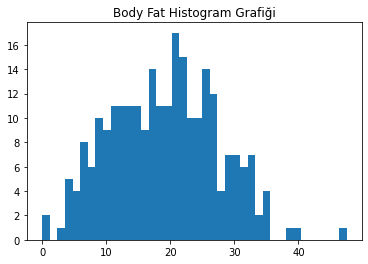

In [3]:
plt.hist(df["BodyFat"],bins=40)
plt.title("Body Fat Histogram Grafiği")
plt.show()

## Info() komutuyla veri setini inceleyelim.

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


## Normalizasyon işlemi yapalım. Bu işlem daha verimli bir sonuç almamızı sağlar.

In [7]:
from sklearn.preprocessing import MinMaxScaler
# Normalizasyon için scaler nesnesi oluşturma
scaler = MinMaxScaler()
# Girdi verilerini normalleştirme (BodyFat hariç tüm sütunlar)
X_normalized = scaler.fit_transform(df.drop('Density', axis=1))
#Normalleştirilmiş verileri DataFrame'e dönüştürme
X_normalized = pd.DataFrame(X_normalized, columns=df.columns.drop('BodyFat'))
print(X_normalized.head())

    Density       Age    Weight    Height      Neck     Chest   Abdomen  \
0  0.258947  0.016949  0.146127  0.792746  0.253731  0.242531  0.200762   
1  0.128421  0.000000  0.223789  0.886010  0.368159  0.251318  0.172808   
2  0.532632  0.000000  0.145105  0.761658  0.144279  0.289982  0.235070   
3  0.218947  0.067797  0.270795  0.886010  0.313433  0.395431  0.216010   
4  0.604211  0.033898  0.268751  0.865285  0.164179  0.316344  0.388818   

        Hip     Thigh      Knee     Ankle    Biceps   Forearm     Wrist  
0  0.151515  0.294264  0.267081  0.189189  0.356436  0.460432  0.232143  
1  0.218501  0.286783  0.267081  0.290541  0.282178  0.568345  0.428571  
2  0.226475  0.309227  0.366460  0.331081  0.198020  0.302158  0.142857  
3  0.258373  0.321696  0.267081  0.250000  0.376238  0.604317  0.428571  
4  0.269537  0.399002  0.571429  0.331081  0.366337  0.482014  0.339286  


## Veri setinin son halini "body" isimli bir csv dosyası olarak kaydettim.

In [8]:
df.to_csv("body.csv",sep=",")

## 3. Multiple Linear Regression işlemine geçelim

In [41]:
from sklearn.linear_model import LinearRegression
df=pd.read_csv("body.csv",sep=",")
df.head()

,Unnamed: 0,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


## Değerlerimizi x ve y değişkenlerine atadıktan sonra fit edelim.

In [42]:
# Girdi ve çıktı değişkenlerini ayırma
X = df.drop('BodyFat', axis=1)
y = df['BodyFat']
from sklearn.model_selection import train_test_split
# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlr=LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression()

In [43]:
y_pred = mlr.predict(X_test)

## Bunlar aslında b0 ve b1 değerlerimiz

In [44]:
print(mlr.intercept_,mlr.coef_)

444.08345045690885 [-1.39434952e-03 -4.04077351e+02  2.12988976e-02  2.32113337e-02
 -1.40612530e-02 -9.26794173e-03  1.01572604e-02  2.29102410e-02
  1.95324049e-02 -2.69300932e-02 -2.10420250e-02 -1.26430415e-01
 -4.91496362e-02  1.36636219e-02 -2.93639823e-02]


## Mutliple linar regression kullanarak r2 score, mae, mse, rmse, mape değerlerini bulalım.

In [45]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
print("mlr r2:",r2_score(y_test,y_pred))
print("mlr mae:",mean_absolute_error(y_test,y_pred))
print("mlr mse:",mean_squared_error(y_test,y_pred))
print("mlr rmse:",(mean_squared_error(y_test,y_pred))**0.5)
print("mlr mape:",mean_absolute_percentage_error(y_test,y_pred))

mlr r2: 0.9909291971003428
mlr mae: 0.4838728155763708
mlr mse: 0.42195624399833714
mlr rmse: 0.6495815914866563
mlr mape: 0.028720304975917866


## 4. Decision Tree Regressor kütüphanesini import edip r2 score, mae,mse,rmse,mape değerlerini görelim.

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [47]:
tree_reg=DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)
tree_pred=tree_reg.predict(X_test)
print("tree r2:",r2_score(y_test,tree_pred))
print("tree mae:",mean_absolute_error(y_test,tree_pred))
print("tree mse:",mean_squared_error(y_test,tree_pred))
print("tree rmse:",(mean_squared_error(y_test,tree_pred))**0.5)
print("tree mape:",mean_absolute_percentage_error(y_test,tree_pred))

tree r2: 0.9886993102935282
tree mae: 0.3901960784313724
tree mse: 0.5256862745098039
tree rmse: 0.7250422570511348
tree mape: 0.024116472068132836


## 5. Random Forest Regressor kullanarak değerlerimizi predict edelim ve r2 score, mae, mse, rmse, mape değerlerine bakalım.

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=37)
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
print("rf r2:",r2_score(y_test,rf_pred))
print("rf mae:",mean_absolute_error(y_test,rf_pred))
print("tree mse:",mean_squared_error(y_test,rf_pred))
print("tree rmse:",(mean_squared_error(y_test,rf_pred))**0.5)
print("tree mape:",mean_absolute_percentage_error(y_test,rf_pred))

rf r2: 0.9983575119820486
rf mae: 0.18192156862745168
tree mse: 0.07640537254902038
tree rmse: 0.27641521765094695
tree mape: 0.012982373232185457


## 6. Son olarak birlikte sonuçları görmek için train test split uygulayalım

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=37)

mlr=LinearRegression()
mlr.fit(x_train,y_train)
mlr_pred=mlr.predict(x_test)

dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)


rf=RandomForestRegressor(n_estimators=100,random_state=37)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

In [50]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("mlr: ","r2:",r2_score(y_test,mlr_pred),"mae:",mean_absolute_error(y_test,mlr_pred))
print("dt: ","r2:",r2_score(y_test,dt_pred),"mae:",mean_absolute_error(y_test,dt_pred))
print("rf: ","r2:",r2_score(y_test,rf_pred),"mae:",mean_absolute_error(y_test,rf_pred))

mlr:  r2: 0.9891758332364377 mae: 0.5253012423158717
dt:  r2: 0.9946813104785936 mae: 0.3196078431372554
rf:  r2: 0.9979444747326535 mae: 0.18421568627451143


## Yorum:

* En başından itibaren train değerlerle çalıştım ve overfite düşmemiş oldu. Hatanın nereden kaynaklandığını analdığımızda sorunu daha kolay çözebiliyoruz.
* MSE değeri modelin ortalama kare hatasıdır.Ne kadar az o kadar iyi.MSE=8.80X10-5=0.628
* RMSE=0.00938(Kök ortalama kare hata)
* Bu değerler gösteriyor ki düşük bir MSE değeri modelin gerçek değerlere ne kadar yakın tahmin yaptığını gösterir.
* r2_score, modelin bağımsız değişkenlerinin varyansının %62.8 açıkladığını gösterir.

## Birkaç ek bilgi 

In [51]:
df_errors = pd.DataFrame({'Gerçek': y_test, 'Tahmin': y_pred})
df_errors['Hata'] = df_errors['Gerçek'] - df_errors['Tahmin']

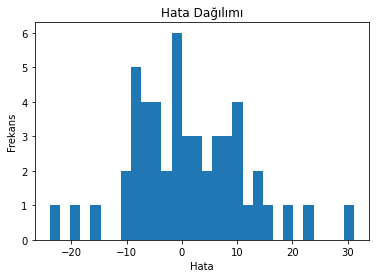

In [52]:
import matplotlib.pyplot as plt

# Hataların histogramını çizme
plt.hist(df_errors['Hata'], bins=30)
plt.xlabel('Hata')
plt.ylabel('Frekans')
plt.title('Hata Dağılımı')
plt.show()

In [53]:
df_errors

,Gerçek,Tahmin,Hata
113,21.3,19.524975,1.775025
30,11.9,19.373721,-7.473721
133,26.1,27.543696,-1.443696
40,34.5,20.412019,14.087981
4,28.7,16.628782,12.071218
192,15.9,12.098163,3.801837
66,21.5,22.329181,-0.829181
127,17.4,19.163223,-1.763223
161,14.6,11.920730,2.679270
237,27.3,11.136973,16.163027


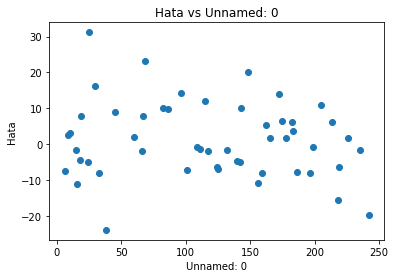

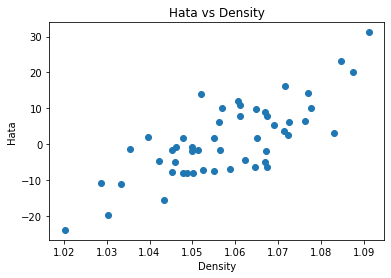

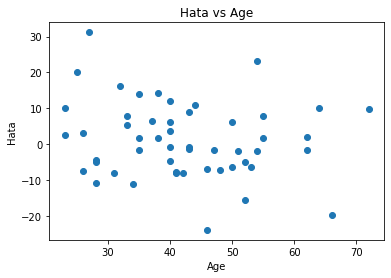

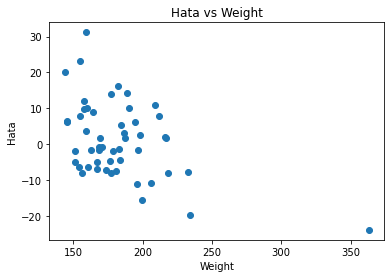

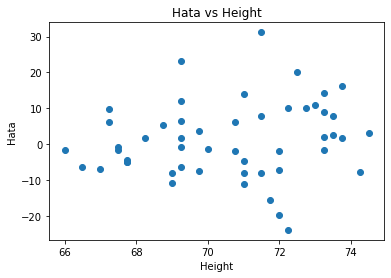

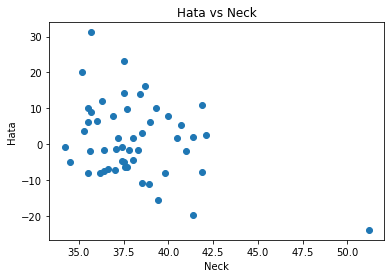

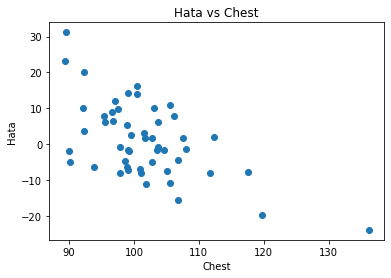

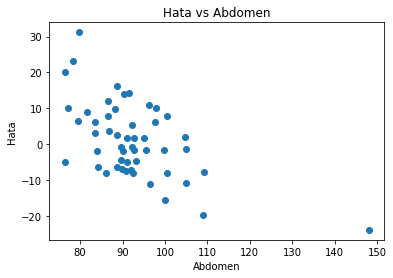

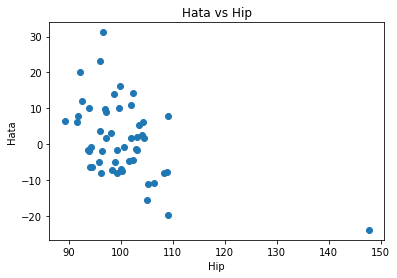

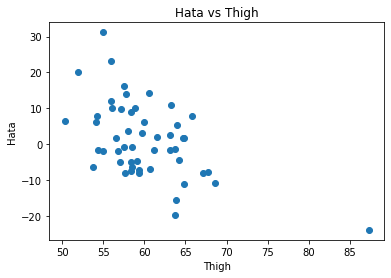

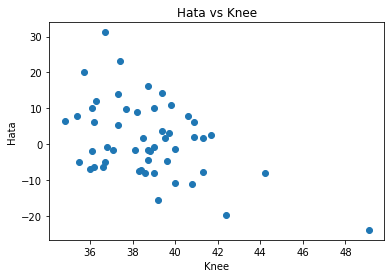

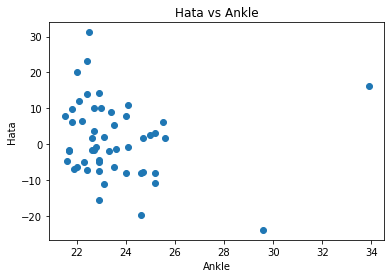

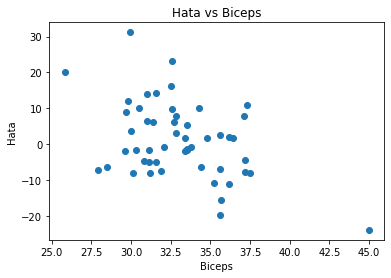

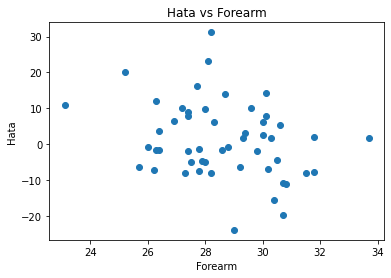

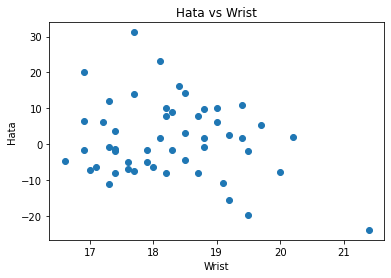

In [54]:
hatalar = y_test - y_pred

for feature in X_train.columns:
    plt.scatter(X_test[feature], hatalar)
    plt.title(f"Hata vs {feature}")
    plt.xlabel(feature)
    plt.ylabel('Hata')
    plt.show()